<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Relevant-Libraries" data-toc-modified-id="Import-Relevant-Libraries-1">Import Relevant Libraries</a></span></li><li><span><a href="#Read-Data-File" data-toc-modified-id="Read-Data-File-2">Read Data File</a></span></li><li><span><a href="#Define-Actual-vs.-Predicted-Plotting-Function" data-toc-modified-id="Define-Actual-vs.-Predicted-Plotting-Function-3">Define Actual vs. Predicted Plotting Function</a></span></li><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-4">Linear Regression</a></span></li><li><span><a href="#Lasso-Regression" data-toc-modified-id="Lasso-Regression-5">Lasso Regression</a></span></li><li><span><a href="#Ridge-Regression" data-toc-modified-id="Ridge-Regression-6">Ridge Regression</a></span></li><li><span><a href="#Elastic-Net-Regression" data-toc-modified-id="Elastic-Net-Regression-7">Elastic Net Regression</a></span></li><li><span><a href="#K-Nearest-Neighbors-Regression" data-toc-modified-id="K-Nearest-Neighbors-Regression-8">K Nearest Neighbors Regression</a></span></li><li><span><a href="#Support-Vector-Regression" data-toc-modified-id="Support-Vector-Regression-9">Support Vector Regression</a></span></li><li><span><a href="#Decision-Tree-Regression" data-toc-modified-id="Decision-Tree-Regression-10">Decision Tree Regression</a></span></li><li><span><a href="#Random-Forest-Regression" data-toc-modified-id="Random-Forest-Regression-11">Random Forest Regression</a></span></li><li><span><a href="#Decision-Trees-with-Gradient-Boosting-using-XGBoost" data-toc-modified-id="Decision-Trees-with-Gradient-Boosting-using-XGBoost-12">Decision Trees with Gradient Boosting using XGBoost</a></span></li><li><span><a href="#ML-Algorithm-Extrapolation-Performance-Comparison" data-toc-modified-id="ML-Algorithm-Extrapolation-Performance-Comparison-13">ML Algorithm Extrapolation Performance Comparison</a></span></li></ul></div>

## Import Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data File

In [2]:
df = pd.read_csv('Overall Data - Consolidated.csv') # Use Data that includes Conversion = 0% at t0.
df

,Condition,Sty wt%,Sty:AIBN,Residence_Time,Conversion
0,1,0.3,150,0,0.000000
1,2,0.3,100,0,0.000000
2,3,0.3,50,0,0.000000
3,4,0.4,150,0,0.000000
4,5,0.4,100,0,0.000000
...,...,...,...,...,...
130,23,0.4,250,120,27.908477
131,24,0.4,200,120,28.170813
132,25,0.5,300,120,25.428060
133,26,0.5,250,120,30.682166


In [3]:
# Remove all conditions with residence time = 120 min
df_ = df[df['Residence_Time'] != 120]
df_ = df_.drop(['Condition'], axis=1)
X_train = df_.iloc[:,:3]
y_train = df_.iloc[:,-1]
df_

,Sty wt%,Sty:AIBN,Residence_Time,Conversion
0,0.3,150,0,0.000000
1,0.3,100,0,0.000000
2,0.3,50,0,0.000000
3,0.4,150,0,0.000000
4,0.4,100,0,0.000000
...,...,...,...,...
103,0.4,250,90,24.353020
104,0.4,200,90,26.103902
105,0.5,300,90,22.431449
106,0.5,250,90,28.025380


In [4]:
# Inspect X_train
X_train

,Sty wt%,Sty:AIBN,Residence_Time
0,0.3,150,0
1,0.3,100,0
2,0.3,50,0
3,0.4,150,0
4,0.4,100,0
...,...,...,...
103,0.4,250,90
104,0.4,200,90
105,0.5,300,90
106,0.5,250,90


In [5]:
# Inspect y_train
y_train

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
         ...    
103    24.353020
104    26.103902
105    22.431449
106    28.025380
107    28.791491
Name: Conversion, Length: 108, dtype: float64

In [100]:
# Inspect df containing only residence time of 120 min.
df_120 = df[df['Residence_Time'] == 120]
df_120

,Condition,Sty wt%,Sty:AIBN,Residence_Time,Conversion
108,1,0.3,150,120,28.449042
109,2,0.3,100,120,33.112321
110,3,0.3,50,120,45.182146
111,4,0.4,150,120,28.394368
112,5,0.4,100,120,33.729853
113,6,0.4,50,120,48.926124
114,7,0.5,150,120,35.509770
115,8,0.5,100,120,46.204493
116,9,0.5,50,120,51.127636
117,10,0.6,300,120,27.907939


In [7]:
df_120 = df_120.drop(['Condition'], axis=1)
X_test = df_120.iloc[:,:3]
y_test = df_120.iloc[:,-1]

In [8]:
X_test

,Sty wt%,Sty:AIBN,Residence_Time
108,0.3,150,120
109,0.3,100,120
110,0.3,50,120
111,0.4,150,120
112,0.4,100,120
113,0.4,50,120
114,0.5,150,120
115,0.5,100,120
116,0.5,50,120
117,0.6,300,120


In [9]:
y_test

108    28.449042
109    33.112321
110    45.182146
111    28.394368
112    33.729853
113    48.926124
114    35.509770
115    46.204493
116    51.127636
117    27.907939
118    36.637091
119    36.555286
120    33.806196
121    39.727959
122    44.045265
123    47.492676
124    42.532020
125    46.245126
126    18.952688
127    19.618362
128    24.027757
129    22.330666
130    27.908477
131    28.170813
132    25.428060
133    30.682166
134    35.261377
Name: Conversion, dtype: float64

In [10]:
X_train.columns

Index(['Sty wt%', 'Sty:AIBN', 'Residence_Time'], dtype='object')

In [11]:
# Feature and Target Scaling
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = pd.DataFrame(scaler_X.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler_X.transform(X_test), columns=X_train.columns)

y_train = pd.DataFrame(scaler_y.fit_transform(np.array(y_train).reshape(-1,1)), columns = ['Conversion'])
y_test = pd.DataFrame(scaler_y.transform(np.array(y_test).reshape(-1,1)), columns = ['Conversion'])

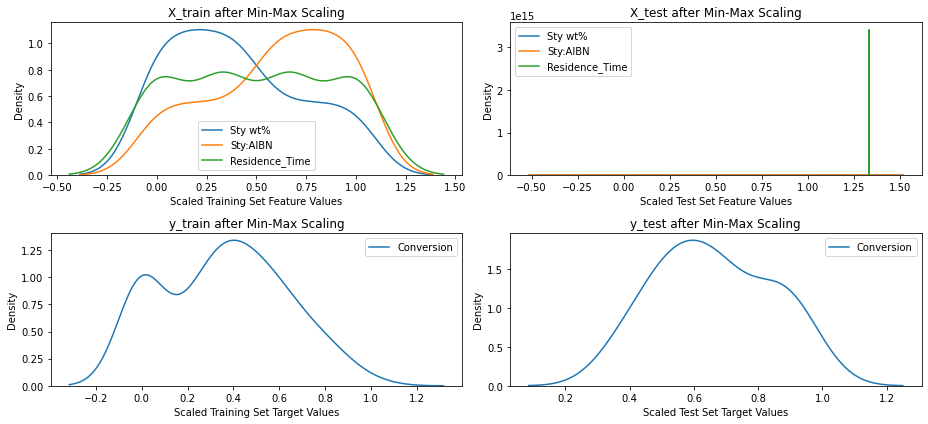

In [12]:
# Visualize Scaled Feature and Target Range using Density Plots

plt.figure(figsize=(13,6))

plt.subplot(2,2,1)
plt.title('X_train after Min-Max Scaling')
plt.xlabel('Scaled Training Set Feature Values')
plt.ylabel('Density')

for feature in X_train:
    sns.kdeplot(X_train[feature], label=str(feature))
    plt.legend()
    
plt.subplot(2,2,2)
plt.title('X_test after Min-Max Scaling')
plt.xlabel('Scaled Test Set Feature Values')
plt.ylabel('Density')

for feature in X_test:
    sns.kdeplot(X_test[feature], label=str(feature))
    plt.legend()
    
plt.subplot(2,2,3)
plt.title('y_train after Min-Max Scaling')
plt.xlabel('Scaled Training Set Target Values')
plt.ylabel('Density')

for target in y_train:
    sns.kdeplot(y_train[target], label=str(target))
    plt.legend()

plt.subplot(2,2,4)
plt.title('y_test after Min-Max Scaling')
plt.xlabel('Scaled Test Set Target Values')
plt.ylabel('Density')

for target in y_test:
    sns.kdeplot(y_test[target], label=str(target))
    plt.legend()    

plt.tight_layout()
plt.show()

## Define Actual vs. Predicted Plotting Function

In [13]:
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

def plot(regressor_name, y_train, y_pred_train, y_test, y_pred_test):

    plt.figure(figsize = (14,6))

    ax1 = plt.subplot(121)

    plt.scatter(y_train,y_pred_train)
    
    plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()],'k--', lw=3) 
    
    plt.xlabel('Actual Value',fontsize=16)
    plt.ylabel('Predicted Value',fontsize=16)

    rmse_train = np.round(mean_squared_error(y_train,y_pred_train, squared=False),3)
    r2_train = np.round(r2_score(y_train,y_pred_train),3)
    
    plt.title(regressor_name+ ' \nTraining Set' '\nRMSE: '+str(rmse_train) + '\n$R^{2}$: ' + str(r2_train),fontsize=16)
    plt.rc('xtick',labelsize=10)
    plt.rc('ytick',labelsize=10)

    ax2 = plt.subplot(122)
    
    plt.scatter(y_test,y_pred_test)
    
    plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=3) 
    
    plt.xlabel('Actual Value',fontsize=16)
    plt.ylabel('Predicted Value',fontsize=16)
    
    rmse_test = np.round((mean_squared_error(y_test,y_pred_test, squared=False)),3)
    r2_test = np.round(r2_score(y_test,y_pred_test),3)
    
    plt.title(regressor_name+' \nTest Set' '\nRMSE: '+str(rmse_test) + '\n$R^{2}$: ' + str(r2_test),fontsize=16)
    plt.rc('xtick',labelsize=10)
    plt.rc('ytick',labelsize=10)
    
    plt.tight_layout()
    plt.show()

In [14]:
# Create empty dictionaries to store regressor scores.

train_rmse = {}
train_r2 = {}

test_rmse = {}
test_r2 = {}

## Linear Regression

In [15]:
# Linear Regression; No Hyperparameters, CV not executed.

# Import Regressor
from sklearn.linear_model import LinearRegression

# Instantiation and Fitting
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict on Training Set
y_pred_train = regressor.predict(X_train)
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.index = y_train.index
y_pred_train.columns = y_train.columns

# Predict on Test Set
y_pred_test = regressor.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.index = y_test.index
y_pred_test.columns = y_test.columns

# Print Training and Test Scores
print(f'Training Score (RMSE) = {np.round(mean_squared_error(y_train, y_pred_train, squared=False),3)}')
print(f'Training Score (R Squared) = {np.round(r2_score(y_train, y_pred_train),3)}')

print(f'\nTest Score (RMSE) = {np.round(mean_squared_error(y_test, y_pred_test, squared=False),3)}')
print(f'Test Score (R Squared) = {np.round(r2_score(y_test, y_pred_test),3)}')

Training Score (RMSE) = 0.084
Training Score (R Squared) = 0.9

Test Score (RMSE) = 0.253
Test Score (R Squared) = -1.111


In [16]:
# Store Linear Regression Scores

train_rmse['Linear Regression'] = mean_squared_error(y_train,y_pred_train, squared=False)
train_r2['Linear Regression'] = r2_score(y_train,y_pred_train)

test_rmse['Linear Regression'] = mean_squared_error(y_test,y_pred_test, squared=False)
test_r2['Linear Regression'] = r2_score(y_test,y_pred_test)

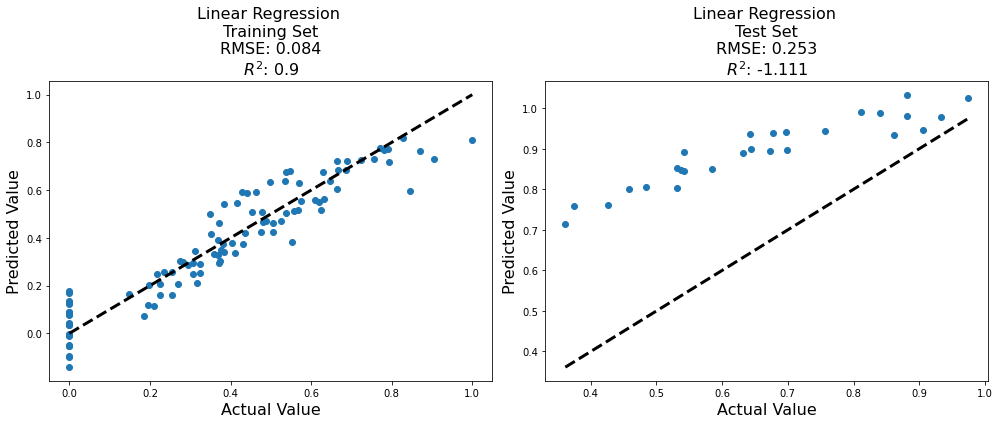

In [17]:
# Plot Predicted Value vs. Actual Value for Linear Regressor

plot('Linear Regression', y_train, y_pred_train, y_test, y_pred_test)

## Lasso Regression

In [18]:
# Lasso Regression

# Import Regressor and GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Instantiate Regressor
lasso = Lasso(random_state = 42)

# Define Parameter Grid for subsequent Grid Search
param_grid = {'alpha' : np.arange(0.05, 1.05, 0.05)}

# Execute Grid Search
regressor = GridSearchCV(estimator = lasso,
                         param_grid = param_grid,
                         scoring = 'neg_mean_squared_error',
                         n_jobs = -1,
                         cv = 5,
                         refit = True, # Hyperparameters automatically refit onto regressor.
                         return_train_score = True)

# Fit Regressor
regressor.fit(X_train, y_train)

# Predict on Training Set
y_pred_train = regressor.predict(X_train)
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.index = y_train.index
y_pred_train.columns = y_train.columns

# Predict on Test Set
y_pred_test = regressor.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.index = y_test.index
y_pred_test.columns = y_test.columns

# Print Best Estimator, Hyperparameter Combination, Training and Test Scores
print(f'Best Estimator : {regressor.best_estimator_}')
print(f'Best Hyperparameter Combination: {regressor.best_params_}')
print(f'Best Mean CV Test Score: {-regressor.best_score_}')

print(f'\nTraining Score (RMSE) = {np.round(mean_squared_error(y_train, y_pred_train, squared=False),3)}')
print(f'Training Score (R Squared) = {np.round(r2_score(y_train, y_pred_train),3)}')

print(f'\nTest Score (RMSE) = {np.round(mean_squared_error(y_test, y_pred_test, squared=False),3)}')
print(f'Test Score (R Squared) = {np.round(r2_score(y_test, y_pred_test),3)}')

Best Estimator : Lasso(alpha=0.05, random_state=42)
Best Hyperparameter Combination: {'alpha': 0.05}
Best Mean CV Test Score: 0.0644202206450512

Training Score (RMSE) = 0.178
Training Score (R Squared) = 0.552

Test Score (RMSE) = 0.187
Test Score (R Squared) = -0.152


In [19]:
# Store Lasso Regression Scores

train_rmse['Lasso Regression'] = mean_squared_error(y_train,y_pred_train, squared=False)
train_r2['Lasso Regression'] = r2_score(y_train,y_pred_train)

test_rmse['Lasso Regression'] = mean_squared_error(y_test,y_pred_test, squared=False)
test_r2['Lasso Regression'] = r2_score(y_test,y_pred_test)

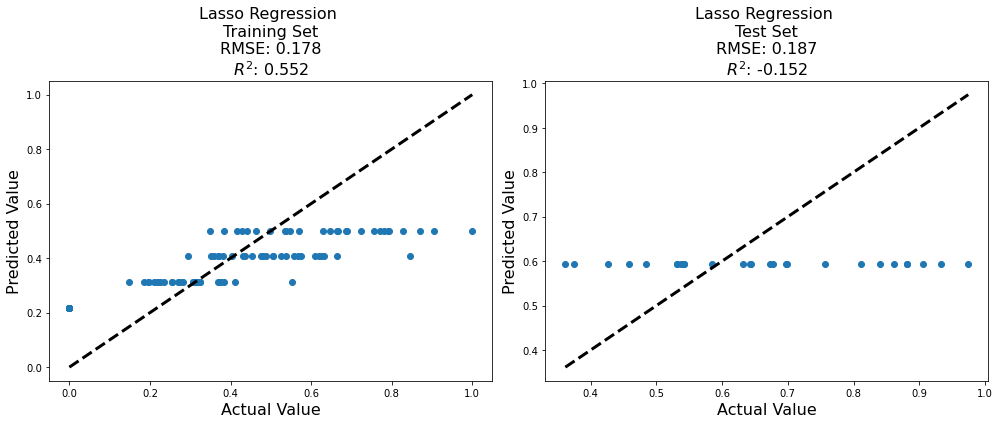

In [20]:
# Plot Predicted Value vs. Actual Value for Lasso Regressor

plot('Lasso Regression', y_train, y_pred_train, y_test, y_pred_test)

## Ridge Regression

In [21]:
# Ridge Regression

# Import Regressor
from sklearn.linear_model import Ridge

# Instantiate Regressor
ridge = Ridge(random_state = 42)

# Define Parameter Grid for subsequent Grid Search
param_grid = {'alpha' : np.arange(0.05, 1.05, 0.05)}

# Execute Grid Search
regressor = GridSearchCV(estimator = ridge,
                         param_grid = param_grid,
                         scoring = 'neg_mean_squared_error',
                         n_jobs = -1,
                         cv = 5,
                         refit = True,
                         return_train_score = True)

# Fit Regressor
regressor.fit(X_train, y_train)

# Predict on Training Set
y_pred_train = regressor.predict(X_train)
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.index = y_train.index
y_pred_train.columns = y_train.columns

# Predict on Test Set
y_pred_test = regressor.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.index = y_test.index
y_pred_test.columns = y_test.columns

# Print Best Estimator, Hyperparameter Combination, Training and Test Scores
print(f'Best Estimator : {regressor.best_estimator_}')
print(f'Best Hyperparameter Combination: {regressor.best_params_}')
print(f'Best Mean CV Test Score: {-regressor.best_score_}')

print(f'\nTraining Score (RMSE) = {np.round(mean_squared_error(y_train, y_pred_train, squared=False),3)}')
print(f'Training Score (R Squared) = {np.round(r2_score(y_train, y_pred_train),3)}')

print(f'\nTest Score (RMSE) = {np.round(mean_squared_error(y_test, y_pred_test, squared=False),3)}')
print(f'Test Score (R Squared) = {np.round(r2_score(y_test, y_pred_test),3)}')

Best Estimator : Ridge(alpha=0.3, random_state=42)
Best Hyperparameter Combination: {'alpha': 0.3}
Best Mean CV Test Score: 0.013976608205910512

Training Score (RMSE) = 0.084
Training Score (R Squared) = 0.9

Test Score (RMSE) = 0.245
Test Score (R Squared) = -0.973


In [22]:
# Store Ridge Regression Scores

train_rmse['Ridge Regression'] = mean_squared_error(y_train,y_pred_train, squared=False)
train_r2['Ridge Regression'] = r2_score(y_train,y_pred_train)

test_rmse['Ridge Regression'] = mean_squared_error(y_test,y_pred_test, squared=False)
test_r2['Ridge Regression'] = r2_score(y_test,y_pred_test)

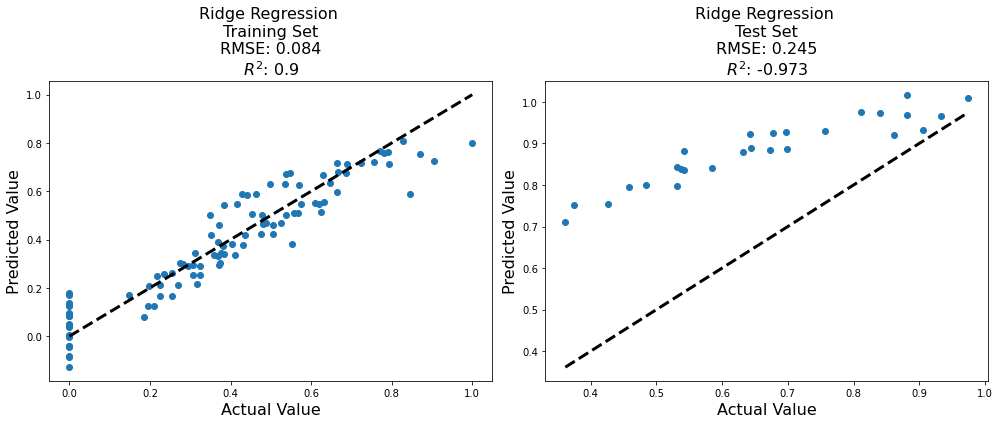

In [23]:
# Plot Predicted Value vs. Actual Value for Ridge Regressor

plot('Ridge Regression', y_train, y_pred_train, y_test, y_pred_test)

## Elastic Net Regression

In [24]:
# Elastic Net Regression

# Import Regressor
from sklearn.linear_model import ElasticNet

# Instantiate Regressor
enet = ElasticNet(random_state = 42)

# Define Parameter Grid for subsequent Grid Search
param_grid = {'alpha' : np.arange(0.05, 1.05, 0.05),
             'l1_ratio' : np.arange(0.05, 1.05, 0.05)}

# Execute Grid Search
regressor = GridSearchCV(estimator = enet,
                         param_grid = param_grid,
                         scoring = 'neg_mean_squared_error',
                         cv = 5,
                         n_jobs = -1,
                         refit = True,
                         return_train_score = True)

# Fit Regressor
regressor.fit(X_train, y_train)

# Predict on Training Set
y_pred_train = regressor.predict(X_train)
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.index = y_train.index
y_pred_train.columns = y_train.columns

# Predict on Test Set
y_pred_test = regressor.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.index = y_test.index
y_pred_test.columns = y_test.columns

# Print Best Estimator, Hyperparameter Combination, Training and Test Scores
print(f'Best Estimator : {regressor.best_estimator_}')
print(f'Best Hyperparameter Combination: {regressor.best_params_}')
print(f'Best Mean CV Test Score: {-regressor.best_score_}')

print(f'\nTraining Score (RMSE) = {np.round(mean_squared_error(y_train, y_pred_train, squared=False),3)}')
print(f'Training Score (R Squared) = {np.round(r2_score(y_train, y_pred_train),3)}')

print(f'\nTest Score (RMSE) = {np.round(mean_squared_error(y_test, y_pred_test, squared=False),3)}')
print(f'Test Score (R Squared) = {np.round(r2_score(y_test, y_pred_test),3)}')

Best Estimator : ElasticNet(alpha=0.05, l1_ratio=0.05, random_state=42)
Best Hyperparameter Combination: {'alpha': 0.05, 'l1_ratio': 0.05}
Best Mean CV Test Score: 0.023412546611541674

Training Score (RMSE) = 0.115
Training Score (R Squared) = 0.814

Test Score (RMSE) = 0.161
Test Score (R Squared) = 0.143


In [25]:
# Store Elastic Net Regression Scores

train_rmse['Elastic Net Regression'] = mean_squared_error(y_train,y_pred_train, squared=False)
train_r2['Elastic Net Regression'] = r2_score(y_train,y_pred_train)

test_rmse['Elastic Net Regression'] = mean_squared_error(y_test,y_pred_test, squared=False)
test_r2['Elastic Net Regression'] = r2_score(y_test,y_pred_test)

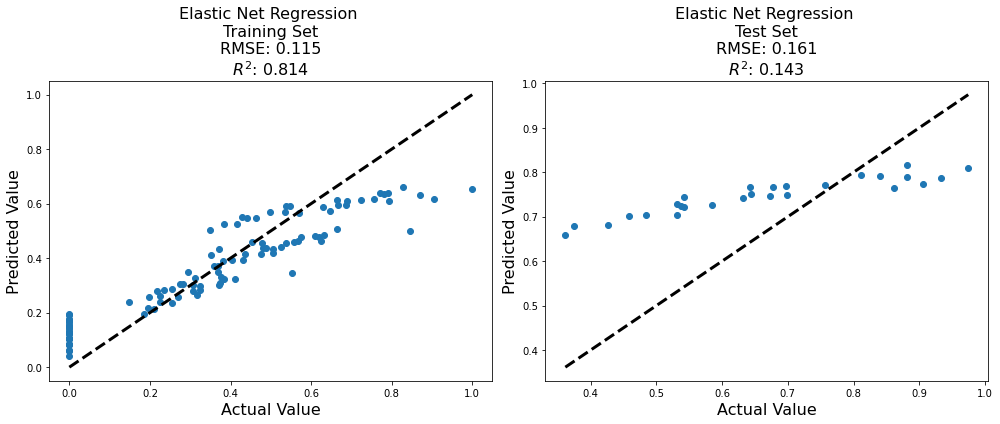

In [26]:
# Plot Predicted Value vs. Actual Value for Elastic Net Regressor

plot('Elastic Net Regression', y_train, y_pred_train, y_test, y_pred_test)

## K Nearest Neighbors Regression

In [27]:
# K Nearest Neighbors Regression

# Import Regressor
from sklearn.neighbors import KNeighborsRegressor

# Instantiate Regressor
knn_reg = KNeighborsRegressor()

# Define Parameter Grid for subsequent Grid Search
param_grid = {'n_neighbors' : np.arange(1, 11, 1),
             'weights' : ['distance', 'uniform'],
             'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
             'leaf_size' : np.arange(30, 110, 10),
             'p' : np.arange(1, 11, 1)}

# Execute Grid Search
regressor = GridSearchCV(estimator = knn_reg,
                        param_grid = param_grid,
                        scoring = 'neg_mean_squared_error',
                        cv = 5,
                        n_jobs = -1,
                        refit = True,
                        return_train_score = True)

# Fit Regressor
regressor.fit(X_train, y_train)

# Predict on Training Set
y_pred_train = regressor.predict(X_train)
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.index = y_train.index
y_pred_train.columns = y_train.columns

# Predict on Test Set
y_pred_test = regressor.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.index = y_test.index
y_pred_test.columns = y_test.columns

# Print Best Estimator, Hyperparameter Combination, Training and Test Scores
print(f'Best Estimator : {regressor.best_estimator_}')
print(f'Best Hyperparameter Combination: {regressor.best_params_}')
print(f'Best Mean CV Test Score: {-regressor.best_score_}')

print(f'\nTraining Score (RMSE) = {np.round(mean_squared_error(y_train, y_pred_train, squared=False),3)}')
print(f'Training Score (R Squared) = {np.round(r2_score(y_train, y_pred_train),3)}')

print(f'\nTest Score (RMSE) = {np.round(mean_squared_error(y_test, y_pred_test, squared=False),3)}')
print(f'Test Score (R Squared) = {np.round(r2_score(y_test, y_pred_test),3)}')

Best Estimator : KNeighborsRegressor(algorithm='brute', n_neighbors=4, p=1, weights='distance')
Best Hyperparameter Combination: {'algorithm': 'brute', 'leaf_size': 30, 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
Best Mean CV Test Score: 0.016747637999880015

Training Score (RMSE) = 0.0
Training Score (R Squared) = 1.0

Test Score (RMSE) = 0.067
Test Score (R Squared) = 0.853


In [28]:
# Store K Nearest Neighbors Regression Scores

train_rmse['K Nearest Neighbors Regression'] = mean_squared_error(y_train,y_pred_train, squared=False)
train_r2['K Nearest Neighbors Regression'] = r2_score(y_train,y_pred_train)

test_rmse['K Nearest Neighbors Regression'] = mean_squared_error(y_test,y_pred_test, squared=False)
test_r2['K Nearest Neighbors Regression'] = r2_score(y_test,y_pred_test)

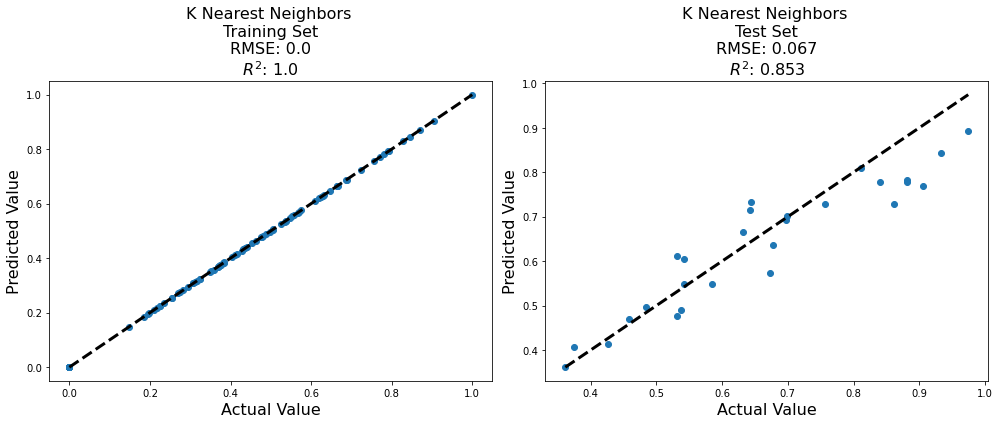

In [29]:
# Plot Predicted Value vs. Actual Value for K Nearest Neighbors Regressor

plot('K Nearest Neighbors', y_train, y_pred_train, y_test, y_pred_test)

## Support Vector Regression

In [30]:
# Support Vector Regression

# Import Regressor
from sklearn.svm import SVR

# Instantiate Regressor
svr_reg = SVR()

# Define Parameter Grid for subsequent Grid Search
param_grid = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'], # 'precomputed' requires X to be a square matrix.
              'C' : np.arange(0.5, 5.5, 0.5),
              'epsilon' : np.arange(0, 0.5, 0.1),
              'degree' : np.arange(1, 6, 1),
              'gamma' : ['scale', 'auto']}

# Execute Grid Search
regressor = GridSearchCV(estimator = svr_reg,
                        param_grid = param_grid,
                        scoring = 'neg_mean_squared_error',
                        cv = 5,
                        n_jobs = -1,
                        refit = True,
                        return_train_score = True)

# Fit Regressor
regressor.fit(X_train, np.ravel(y_train))

# Predict on Training Set
y_pred_train = regressor.predict(X_train)
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.index = y_train.index
y_pred_train.columns = y_train.columns

# Predict on Test Set
y_pred_test = regressor.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.index = y_test.index
y_pred_test.columns = y_test.columns

# Print Best Estimator, Hyperparameter Combination, Training and Test Scores
print(f'Best Estimator : {regressor.best_estimator_}')
print(f'Best Hyperparameter Combination: {regressor.best_params_}')
print(f'Best Mean CV Test Score: {-regressor.best_score_}')

print(f'\nTraining Score (RMSE) = {np.round(mean_squared_error(y_train, y_pred_train, squared=False),3)}')
print(f'Training Score (R Squared) = {np.round(r2_score(y_train, y_pred_train),3)}')

print(f'\nTest Score (RMSE) = {np.round(mean_squared_error(y_test, y_pred_test, squared=False),3)}')
print(f'Test Score (R Squared) = {np.round(r2_score(y_test, y_pred_test),3)}')

Best Estimator : SVR(C=5.0, degree=1, epsilon=0.0, gamma='auto')
Best Hyperparameter Combination: {'C': 5.0, 'degree': 1, 'epsilon': 0.0, 'gamma': 'auto', 'kernel': 'rbf'}
Best Mean CV Test Score: 0.0034486115341484207

Training Score (RMSE) = 0.042
Training Score (R Squared) = 0.975

Test Score (RMSE) = 0.05
Test Score (R Squared) = 0.916


In [31]:
# Store Support Vector Regression Scores

train_rmse['Support Vector Regression'] = mean_squared_error(y_train,y_pred_train, squared=False)
train_r2['Support Vector Regression'] = r2_score(y_train,y_pred_train)

test_rmse['Support Vector Regression'] = mean_squared_error(y_test,y_pred_test, squared=False)
test_r2['Support Vector Regression'] = r2_score(y_test,y_pred_test)

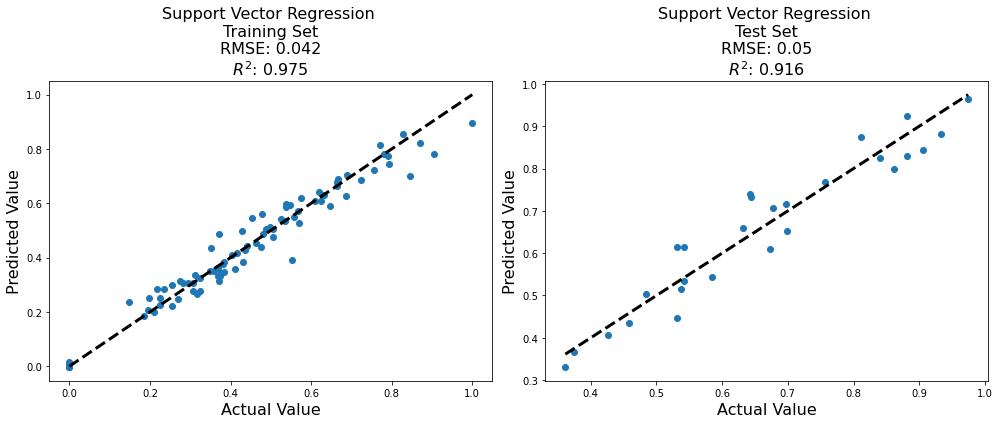

In [32]:
# Plot Predicted Value vs. Actual Value for Support Vector Regressor

plot('Support Vector Regression', y_train, y_pred_train, y_test, y_pred_test)

## Decision Tree Regression

In [33]:
# Decision Tree Regression

# Import Regressor
from sklearn.tree import DecisionTreeRegressor

# Instantiate Regressor
dt = DecisionTreeRegressor(random_state = 42)

# Define Parameter Grid for subsequent Grid Search
param_grid = {'criterion' : ['mse', 'friedman_mse', 'mae', 'poisson'],
              'splitter' : ['best', 'random'],
              'max_depth' : np.arange(1, 11, 1),
              'min_samples_leaf' : np.arange(1, 11, 1)} # 'min_samples_split' causes errors, excluded.
             
# Execute Grid Search
regressor = GridSearchCV(estimator = dt,
                         param_grid = param_grid,
                         scoring = 'neg_mean_squared_error',
                         cv = 5,
                         n_jobs = -1,
                         refit = True,
                         return_train_score = True)

# Fit Regressor
regressor.fit(X_train, y_train)

# Predict on Training Set
y_pred_train = regressor.predict(X_train)
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.index = y_train.index
y_pred_train.columns = y_train.columns

# Predict on Test Set
y_pred_test = regressor.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.index = y_test.index
y_pred_test.columns = y_test.columns

# Print Best Estimator, Hyperparameter Combination, Training and Test Scores
print(f'Best Estimator : {regressor.best_estimator_}')
print(f'Best Hyperparameter Combination: {regressor.best_params_}')
print(f'Best Mean CV Test Score: {-regressor.best_score_}')

print(f'\nTraining Score (RMSE) = {np.round(mean_squared_error(y_train, y_pred_train, squared=False),3)}')
print(f'Training Score (R Squared) = {np.round(r2_score(y_train, y_pred_train),3)}')

print(f'\nTest Score (RMSE) = {np.round(mean_squared_error(y_test, y_pred_test, squared=False),3)}')
print(f'Test Score (R Squared) = {np.round(r2_score(y_test, y_pred_test),3)}')

Best Estimator : DecisionTreeRegressor(criterion='mse', max_depth=6, min_samples_leaf=2,
                      random_state=42, splitter='random')
Best Hyperparameter Combination: {'criterion': 'mse', 'max_depth': 6, 'min_samples_leaf': 2, 'splitter': 'random'}
Best Mean CV Test Score: 0.011686181891587679

Training Score (RMSE) = 0.056
Training Score (R Squared) = 0.955

Test Score (RMSE) = 0.076
Test Score (R Squared) = 0.811


C:\Users\Tan Jin Da\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


In [34]:
# Store Decision Tree Regression Scores

train_rmse['Decision Tree Regression'] = mean_squared_error(y_train,y_pred_train, squared=False)
train_r2['Decision Tree Regression'] = r2_score(y_train,y_pred_train)

test_rmse['Decision Tree Regression'] = mean_squared_error(y_test,y_pred_test, squared=False)
test_r2['Decision Tree Regression'] = r2_score(y_test,y_pred_test)

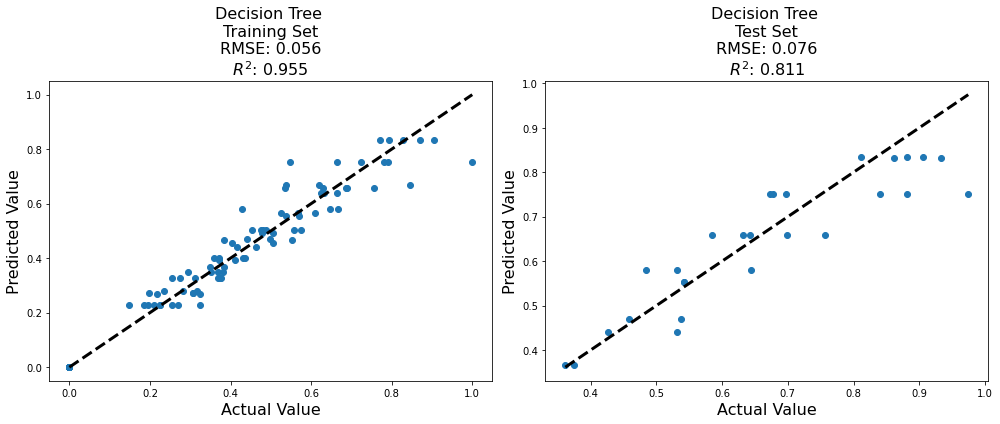

In [35]:
# Plot Predicted Value vs. Actual Value for Decision Tree Regressor

plot('Decision Tree', y_train, y_pred_train, y_test, y_pred_test)

## Random Forest Regression

In [36]:
# Random Forest Regression

# Import Regressor and RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Instantiate Regressor
rf = RandomForestRegressor(random_state = 42)

# Define Parameter Grid for subsequent Random Search
param_grid = {'n_estimators' : np.arange(100, 2100, 100),
             'max_depth' : np.arange(1, 21, 1),
             'min_samples_leaf' : np.arange(1, 21, 1)}

# Execute Random Search
regressor = RandomizedSearchCV(estimator = rf,
                       param_distributions = param_grid,
                       scoring = 'neg_mean_squared_error',
                       cv = 5,
                       refit = True,
                       n_jobs = -1,
                       return_train_score = True,
                       n_iter = 4000,
                       random_state = 42)

# Fit Regressor
regressor.fit(X_train, np.ravel(y_train))

# Predict on Training Set
y_pred_train = regressor.predict(X_train)
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.index = y_train.index
y_pred_train.columns = y_train.columns

# Predict on Test Set
y_pred_test = regressor.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.index = y_test.index
y_pred_test.columns = y_test.columns

rf_regressor = regressor

# Print Best Estimator, Hyperparameter Combination, Training and Test Scores
print(f'Best Estimator : {regressor.best_estimator_}')
print(f'Best Hyperparameter Combination: {regressor.best_params_}')
print(f'Best Mean CV Test Score: {-regressor.best_score_}')

print(f'\nTraining Score (RMSE) = {np.round(mean_squared_error(y_train, y_pred_train, squared=False),3)}')
print(f'Training Score (R Squared) = {np.round(r2_score(y_train, y_pred_train),3)}')

print(f'\nTest Score (RMSE) = {np.round(mean_squared_error(y_test, y_pred_test, squared=False),3)}')
print(f'Test Score (R Squared) = {np.round(r2_score(y_test, y_pred_test),3)}')

Best Estimator : RandomForestRegressor(max_depth=9, n_estimators=400, random_state=42)
Best Hyperparameter Combination: {'n_estimators': 400, 'min_samples_leaf': 1, 'max_depth': 9}
Best Mean CV Test Score: 0.00902216605822132

Training Score (RMSE) = 0.02
Training Score (R Squared) = 0.994

Test Score (RMSE) = 0.057
Test Score (R Squared) = 0.892


In [37]:
# Store Random Forest Regression Scores

train_rmse['Random Forest Regression'] = mean_squared_error(y_train,y_pred_train, squared=False)
train_r2['Random Forest Regression'] = r2_score(y_train,y_pred_train)

test_rmse['Random Forest Regression'] = mean_squared_error(y_test,y_pred_test, squared=False)
test_r2['Random Forest Regression'] = r2_score(y_test,y_pred_test)

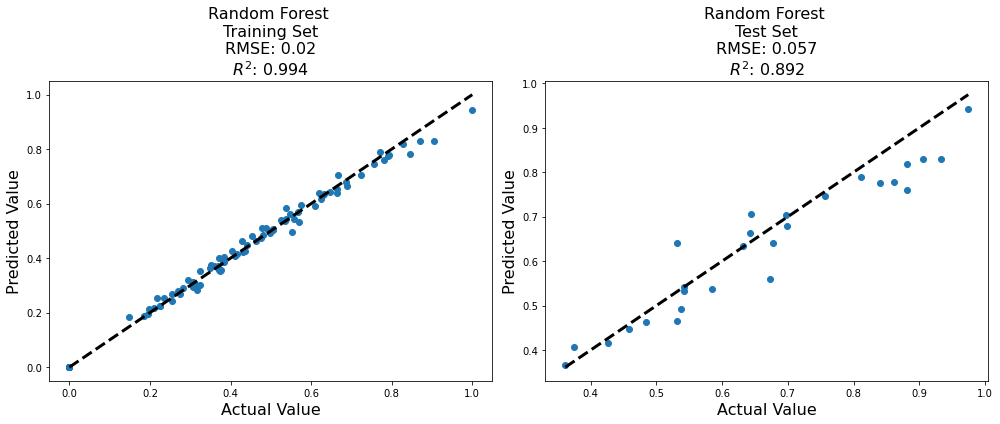

In [38]:
# Plot Predicted Value vs. Actual Value for Random Forest Regressor

plot('Random Forest', y_train, y_pred_train, y_test, y_pred_test)

## Decision Trees with Gradient Boosting using XGBoost

In [39]:
# XGBoost

# Import Regressor
import xgboost as xgb

# Instantiate Regressor
xgb_reg = xgb.XGBRegressor(random_state = 42)

# Define Parameter Grid for subsequent Random Search
param_grid = {'objective':['reg:squarederror'],
             'n_estimators' : np.arange(100, 2100, 100),
             'learning_rate' : np.arange(0.01, 0.02, 0.001),
             'subsample': np.arange(0.05, 0.95, 0.05),
             'max_depth' : np.arange(1, 21, 1)}

# Execute Random Search
regressor = RandomizedSearchCV(estimator = xgb_reg,
                       param_distributions = param_grid,
                       scoring = 'neg_mean_squared_error',
                       cv = 5,
                       refit = True,
                       n_jobs=-1,
                       return_train_score=True,
                       n_iter = 18000,
                       random_state = 42)

# Fit Regressor
regressor.fit(X_train, y_train)

# Predict on Training Set
y_pred_train = regressor.predict(X_train)
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.index = y_train.index
y_pred_train.columns = y_train.columns

# Predict on Test Set
y_pred_test = regressor.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.index = y_test.index
y_pred_test.columns = y_test.columns

# Print Best Estimator, Hyperparameter Combination, Training and Test Scores
print(f'Best Estimator : {regressor.best_estimator_}')
print(f'Best Hyperparameter Combination: {regressor.best_params_}')
print(f'Best Mean CV Test Score: {-regressor.best_score_}')

print(f'\nTraining Score (RMSE) = {np.round(mean_squared_error(y_train, y_pred_train, squared=False),3)}')
print(f'Training Score (R Squared) = {np.round(r2_score(y_train, y_pred_train),3)}')

print(f'\nTest Score (RMSE) = {np.round(mean_squared_error(y_test, y_pred_test, squared=False),3)}')
print(f'Test Score (R Squared) = {np.round(r2_score(y_test, y_pred_test),3)}')

Best Estimator : XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.018999999999999993, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=2, max_leaves=0,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1900, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=42, reg_alpha=0, reg_lambda=1, ...)
Best Hyperparameter Combination: {'subsample': 0.9000000000000001, 'objective': 'reg:squarederror', 'n_estimators': 1900, 'max_depth': 2, 'learning_rate': 0.018999999999999993}
Best Mean CV Test Score: 0.005204146433348767

Training Score (RMSE) = 0.025
Training Score (R Squared) = 

In [47]:
from joblib import load, dump
dump(regressor, 'xgboost_conv_extrapolation.joblib') 

['xgboost_conv_extrapolation.joblib']

In [40]:
sorted(zip(X_train.columns, regressor.best_estimator_.feature_importances_))

[('Residence_Time', 0.80655104),
 ('Sty wt%', 0.10054981),
 ('Sty:AIBN', 0.09289914)]

In [41]:
# Store XGBoost Regression Scores

train_rmse['Gradient Boosted Decision Trees Regression'] = mean_squared_error(y_train,y_pred_train, squared=False)
train_r2['Gradient Boosted Decision Trees Regression'] = r2_score(y_train,y_pred_train)

test_rmse['Gradient Boosted Decision Trees Regression'] = mean_squared_error(y_test,y_pred_test, squared=False)
test_r2['Gradient Boosted Decision Trees Regression'] = r2_score(y_test,y_pred_test)

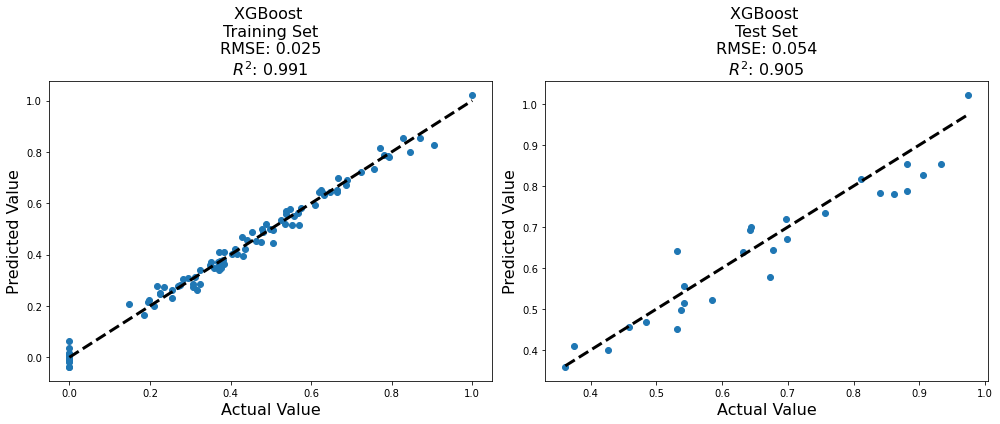

In [42]:
# Plot Predicted Value vs. Actual Value for XGBoost

plot('XGBoost', y_train, y_pred_train, y_test, y_pred_test)

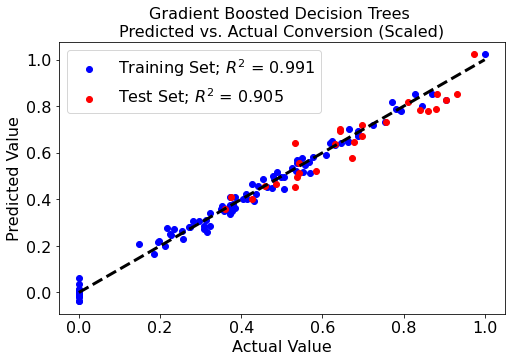

In [43]:
plt.figure(figsize = (8,5))
plt.scatter(y_train,y_pred_train, color='b', label = 'Training Set; $R^{2}$ = ' + str(np.round(r2_score(y_train, y_pred_train),3)))
plt.scatter(y_test,y_pred_test, color='r', label = 'Test Set; $R^{2}$ = ' + str(np.round(r2_score(y_test, y_pred_test),3)))    
plt.plot([0,1],[0,1],'k--', lw=3)
plt.title('Gradient Boosted Decision Trees \nPredicted vs. Actual Conversion (Scaled)', fontsize=16)
plt.xlabel('Actual Value',fontsize=16)
plt.ylabel('Predicted Value',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

## ML Algorithm Extrapolation Performance Comparison

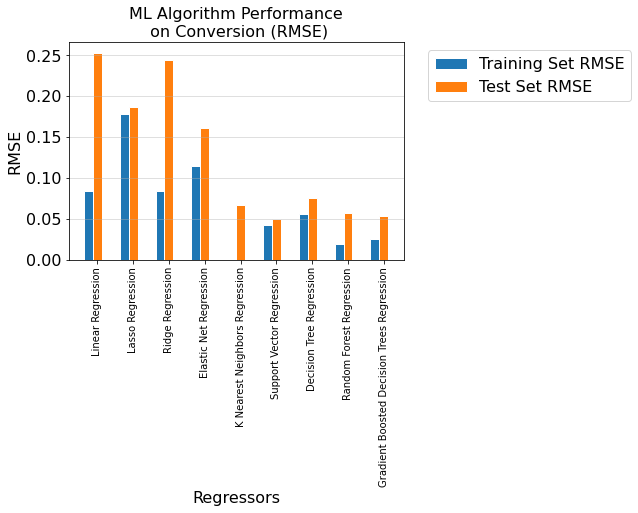

In [44]:
barwidth = 0.25

bars1 = train_rmse.values()
bars2 = test_rmse.values()

r1 = np.arange(len(bars1))
r2 = [x + barwidth for x in r1]

plt.bar(r1, bars1, width=barwidth, edgecolor='white', label='Training Set RMSE')
plt.bar(r2, bars2, width=barwidth, edgecolor='white', label='Test Set RMSE')

plt.xlabel('Regressors', fontsize=16)
plt.xticks([r + barwidth for r in range(len(bars1))], train_rmse.keys(), rotation=90)
plt.yticks(fontsize=16)
plt.ylabel('RMSE', fontsize=16)
plt.title('ML Algorithm Performance\n on Conversion (RMSE)', fontsize=16)
plt.grid(alpha=0.5, which = 'major', axis='y')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)
plt.show()

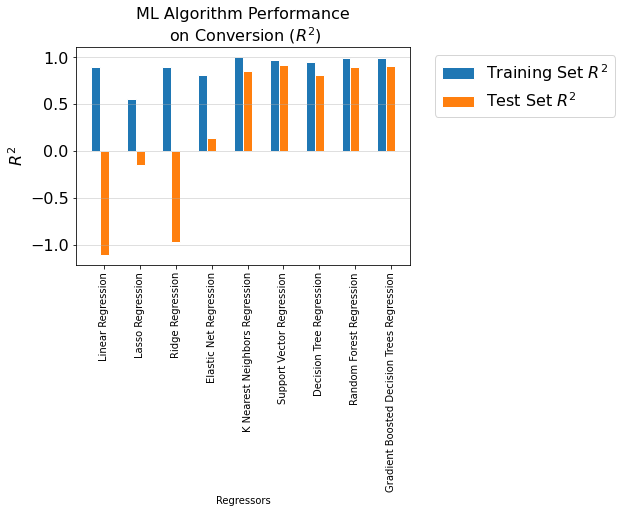

In [45]:
barwidth = 0.25

bars1 = train_r2.values()
bars2 = test_r2.values()

r1 = np.arange(len(bars1))
r2 = [x + barwidth for x in r1]

plt.bar(r1, bars1, width=barwidth, edgecolor='white', label='Training Set $R^{2}$')
plt.bar(r2, bars2, width=barwidth, edgecolor='white', label='Test Set $R^{2}$')

plt.xlabel('Regressors')
plt.xticks([r + barwidth for r in range(len(bars1))], train_rmse.keys(), rotation=90)
plt.yticks(fontsize=16)
plt.ylabel('$R^{2}$', fontsize=16)
plt.title('ML Algorithm Performance\n on Conversion ($R^{2}$)', fontsize=16)
plt.grid(alpha=0.5, which = 'major', axis='y')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)
plt.show()

In [46]:
# Consolidate all ML algo performance metrics and save them into an excel file.

d = {'train_rmse' : train_rmse,
     'test_rmse' : test_rmse,
     'train_r2' : train_r2,
     'test_r2' : test_r2}

conv_ml_perf = pd.DataFrame(d).T
conv_ml_perf

,Linear Regression,Lasso Regression,Ridge Regression,Elastic Net Regression,K Nearest Neighbors Regression,Support Vector Regression,Decision Tree Regression,Random Forest Regression,Gradient Boosted Decision Trees Regression
train_rmse,0.084108,0.178499,0.084303,0.114927,0.000000,0.042239,0.056275,0.019866,0.025180
test_rmse,0.253186,0.187024,0.244725,0.161344,0.066870,0.050424,0.075675,0.057249,0.053829
train_r2,0.900445,0.551604,0.899983,0.814120,1.000000,0.974891,0.955431,0.994446,0.991077
test_r2,-1.111355,-0.152059,-0.972597,0.142590,0.852721,0.916256,0.811379,0.892051,0.904563


In [56]:
conv_test = scaler_y.inverse_transform(y_test)
conv_test

array([[28.44904218],
       [33.11232089],
       [45.18214592],
       [28.39436795],
       [33.72985334],
       [48.92612425],
       [35.50977003],
       [46.20449288],
       [51.12763568],
       [27.9079386 ],
       [36.63709143],
       [36.5552859 ],
       [33.80619571],
       [39.72795874],
       [44.0452651 ],
       [47.49267576],
       [42.53202014],
       [46.24512648],
       [18.9526881 ],
       [19.61836231],
       [24.02775739],
       [22.33066639],
       [27.90847718],
       [28.17081258],
       [25.42805997],
       [30.68216635],
       [35.26137731]])

In [57]:
conv_predicted = scaler_y.inverse_transform(y_pred_test)
conv_predicted

array([[26.995169],
       [33.49744 ],
       [40.965076],
       [29.221722],
       [36.31772 ],
       [44.811954],
       [33.815994],
       [41.344784],
       [53.667194],
       [33.69222 ],
       [35.2277  ],
       [37.805832],
       [36.73786 ],
       [38.49798 ],
       [41.066902],
       [43.4334  ],
       [42.864346],
       [44.777534],
       [18.779625],
       [21.47548 ],
       [23.952364],
       [21.025244],
       [23.701862],
       [26.131699],
       [24.51642 ],
       [27.320972],
       [30.351078]], dtype=float32)

In [84]:
percentage_diff = (abs(conv_test - conv_predicted) / conv_test)*100
percentage_diff

array([[ 5.11044795],
       [ 1.16306993],
       [ 9.33348646],
       [ 2.91379509],
       [ 7.67232854],
       [ 8.4089427 ],
       [ 4.76988661],
       [10.51782802],
       [ 4.96709588],
       [20.72628962],
       [ 3.84689967],
       [ 3.42097176],
       [ 8.6719782 ],
       [ 3.09600737],
       [ 6.76205021],
       [ 8.54716331],
       [ 0.78135346],
       [ 3.17350628],
       [ 0.91313253],
       [ 9.46621735],
       [ 0.31377636],
       [ 5.84587405],
       [15.07289279],
       [ 7.23839245],
       [ 3.58517168],
       [10.95487805],
       [13.92543245]])

In [85]:
absolute_diff = abs(conv_test - conv_predicted)
absolute_diff

array([[1.45387349],
       [0.38511945],
       [4.21706947],
       [0.8273537 ],
       [2.58786517],
       [4.11416975],
       [1.69377577],
       [4.8597091 ],
       [2.53955869],
       [5.78428018],
       [1.40939215],
       [1.25054601],
       [2.93166592],
       [1.22998053],
       [2.97836294],
       [4.05927656],
       [0.33232541],
       [1.467592  ],
       [0.17306316],
       [1.85711682],
       [0.07539342],
       [1.30542263],
       [4.20661484],
       [2.03911397],
       [0.91163961],
       [3.36119391],
       [4.91029928]])

In [101]:
percentage_diff_df = pd.DataFrame({
    'Actual Conversion at 120 min':conv_test.T[0],
    'Predicted Conversion at 120 min': conv_predicted.T[0],
    'Absolute Difference': absolute_diff.T[0],
    'Percentage Difference': percentage_diff.T[0]
})

percentage_diff_df

,Actual Conversion at 120 min,Predicted Conversion at 120 min,Absolute Difference,Percentage Difference
0,28.449042,26.995169,1.453873,5.110448
1,33.112321,33.497440,0.385119,1.163070
2,45.182146,40.965076,4.217069,9.333486
3,28.394368,29.221722,0.827354,2.913795
4,33.729853,36.317719,2.587865,7.672329
5,48.926124,44.811954,4.114170,8.408943
6,35.509770,33.815994,1.693776,4.769887
7,46.204493,41.344784,4.859709,10.517828
8,51.127636,53.667194,2.539559,4.967096
9,27.907939,33.692219,5.784280,20.726290


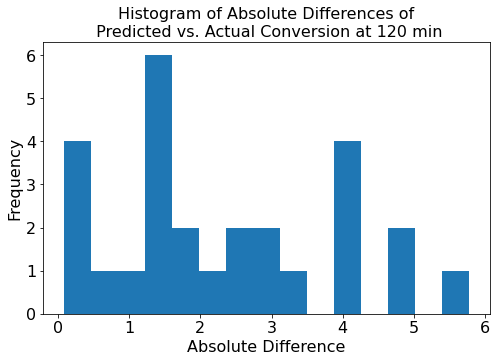

In [94]:
plt.figure(figsize=(8,5))
plt.hist(percentage_diff_df['Absolute Difference'], bins=15)
plt.title('Histogram of Absolute Differences of\n Predicted vs. Actual Conversion at 120 min', fontsize=16)
plt.xticks(ticks = [0, 1, 2, 3, 4, 5, 6], fontsize=16)
plt.yticks(ticks = [0, 1, 2, 3, 4, 5, 6],fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xlabel('Absolute Difference', fontsize=16)
plt.show()

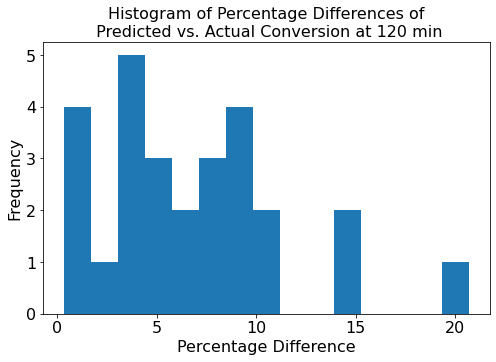

In [95]:
plt.figure(figsize=(8,5))
plt.hist(percentage_diff_df['Percentage Difference'], bins=15)
plt.title('Histogram of Percentage Differences of\n Predicted vs. Actual Conversion at 120 min', fontsize=16)
plt.xticks(ticks = [0, 5, 10, 15, 20], fontsize=16)
plt.yticks(ticks = [0, 1, 2, 3, 4, 5],fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xlabel('Percentage Difference', fontsize=16)
plt.show()

In [109]:
conditions_120 = df_120.iloc[:,:-1]
conditions_120.reset_index(drop=True, inplace=True)

summary_df = pd.concat([conditions_120, percentage_diff_df], axis=1)
summary_df

,Condition,Sty wt%,Sty:AIBN,Residence_Time,Actual Conversion at 120 min,Predicted Conversion at 120 min,Absolute Difference,Percentage Difference
0,1,0.3,150,120,28.449042,26.995169,1.453873,5.110448
1,2,0.3,100,120,33.112321,33.497440,0.385119,1.163070
2,3,0.3,50,120,45.182146,40.965076,4.217069,9.333486
3,4,0.4,150,120,28.394368,29.221722,0.827354,2.913795
4,5,0.4,100,120,33.729853,36.317719,2.587865,7.672329
5,6,0.4,50,120,48.926124,44.811954,4.114170,8.408943
6,7,0.5,150,120,35.509770,33.815994,1.693776,4.769887
7,8,0.5,100,120,46.204493,41.344784,4.859709,10.517828
8,9,0.5,50,120,51.127636,53.667194,2.539559,4.967096
9,10,0.6,300,120,27.907939,33.692219,5.784280,20.726290


In [110]:
summary_df.to_excel('Extrapolated Conversion Summary.xlsx')